<a href="https://colab.research.google.com/github/ykitaguchi77/ImageProcessing/blob/master/Arrange_images2*4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**フォルダ内の画像を、2×4のカラム状に並べて出力するスクリプト**
すでに500*400pixに整形されているものを準備する
Grav, contそれぞれについてカラム状に並べたものを作る
カラム状のものを縦に結合して最終的な画像を作る



In [2]:
from PIL import Image
import glob
from matplotlib import pyplot as plt
%matplotlib inline  

#Google colabをマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#画像のリストを取得
img_path = glob.glob("/content/drive/My Drive/PrePlusTrain/558_colored/grav/*")
print(len(img_path))
#print(img_path)


"""
#画像のサイズを確認
for i in im_list:
    img = Image.open(i)
    width, height = img.size
    print("width:"+str(width)+", height:"+str(height)+", width/height:"+str(width/height))
"""

279


'\n#画像のサイズを確認\nfor i in im_list:\n    img = Image.open(i)\n    width, height = img.size\n    print("width:"+str(width)+", height:"+str(height)+", width/height:"+str(width/height))\n'

#**画像の配列**
参考サイト： https://note.nkmk.me/python-pillow-concat-images/

In [ ]:
def get_concat_h_multi_resize(im_list, resample=Image.BICUBIC):
    min_height = min(im.height for im in im_list)
    im_list_resize = [im.resize((int(im.width * min_height / im.height), min_height),resample=resample)
                      for im in im_list]
    total_width = sum(im.width for im in im_list_resize)
    dst = Image.new('RGB', (total_width, min_height))
    pos_x = 0
    for im in im_list_resize:
        dst.paste(im, (pos_x, 0))
        pos_x += im.width
    return dst

def get_concat_v_multi_resize(im_list, resample=Image.BICUBIC):
    min_width = min(im.width for im in im_list)
    im_list_resize = [im.resize((min_width, int(im.height * min_width / im.width)),resample=resample)
                      for im in im_list]
    total_height = sum(im.height for im in im_list_resize)
    dst = Image.new('RGB', (min_width, total_height))
    pos_y = 0
    for im in im_list_resize:
        dst.paste(im, (0, pos_y))
        pos_y += im.height
    return dst

def get_concat_tile_resize(im_list_2d, resample=Image.BICUBIC):
    im_list_v = [get_concat_h_multi_resize(im_list_h, resample=resample) for im_list_h in im_list_2d]
    return get_concat_v_multi_resize(im_list_v, resample=resample)

In [ ]:
#イメージの数を入力（少なくすることで試すことができる）
img_path = img_path[0:272]
print(img_path)
im = [0]*272


#画像を2*8で配列して保存
k=0
j=0
m=1
for p in range(34): #rangeの中身は結合画像の数。すなわちイメージ数１//8。
    im_list = img_path[k:k+8]
    
    j=0
    for i in im_list:
        im[j] = Image.open(i)
        j+=1
        
    get_concat_tile_resize([[im[0],im[1],im[2],im[3]],[im[4],im[5],im[6],im[7]]]).save("/content/drive/My Drive/PrePlusTrain/PrePlusTrain_配列済/"+"grav"+ str(m)+".png")
    print("画像出力済: "+str(m))
    m+=1
    k+=8


#**2つのカラムを縦に結合**

In [ ]:
def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

In [ ]:
grav_path = glob.glob("/content/drive/My Drive/PrePlusTrain/PrePlusTrain_配列済/grav/*")
cont_path = glob.glob("/content/drive/My Drive/PrePlusTrain/PrePlusTrain_配列済/cont/*")

im = [0]*2
k=0
for i in range(len(grav_path)):
    im[0] = Image.open(cont_path[k])
    im[1] = Image.open(grav_path[k])
    get_concat_v(im[0], im[1]).save("/content/drive/My Drive/PrePlusTrain/PrePlusTrain_配列済/concat"+str(k)+".jpg")
    k+=1
    print("画像出力済: "+str(k))


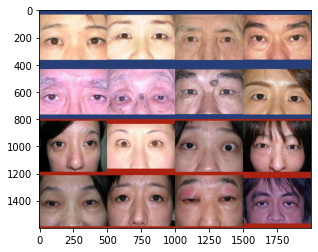

In [ ]:
# 入力画像の読み込み
img = Image.open("/content/drive/My Drive/PrePlusTrain/PrePlusTrain_配列済/concat1.jpg")

# 規定のソフトで画像を閲覧
plt.imshow(img)
plt.show()